# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import os


In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

# metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# ML algorithms
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC


# saving model
import joblib

In [5]:
!wget https://raw.githubusercontent.com/ezzaddeentru/recipe-popularity-prediction/main/helper_functions.py

--2025-01-17 05:48:10--  https://raw.githubusercontent.com/ezzaddeentru/recipe-popularity-prediction/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43593 (43K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  42.57K  --.-KB/s    in 0.01s   

2025-01-17 05:48:10 (3.53 MB/s) - ‘helper_functions.py’ saved [43593/43593]



In [6]:
from helper_functions import *
from helper_functions import plot_confusion_matrix, plot_model_metrics_with_size, plot_metrics_with_plotly, plot_feature_importance
from helper_functions import evaluate_base_model_clf
from helper_functions import classification_metrics_df, combine_and_format_metrics, calculate_cv_metrics
from helper_functions import evaluate_base_model_without_cv_clf, evaluate_and_plot_base_model_clf
from helper_functions import plot_learning_curves

# Data
### **Dataset Description**
The Diabetes Prediction Dataset is a compilation of medical and demographic data collected from patients, combined with their diabetes status (positive or negative). The primary goal is to predict the likelihood of diabetes based on the provided features.

### **Features**
- **Age**: Patient’s age.
- **Gender**: Male or female.
- **Body Mass Index (BMI)**: Measurement of body fat based on height and weight.
- **Hypertension**: Whether the patient has high blood pressure.
- **Heart Disease**: Indicates if the patient has a history of heart disease (1=yes and 0=no).
- **Smoking History**: The patient’s smoking status.
- **HbA1c Level**: Hemoglobin A1c level, indicating average blood sugar over the past 3 months.
- **Blood Glucose Level**: Measurement of glucose in the blood.

> Data source: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset?resource=download

In [7]:
!wget https://raw.githubusercontent.com/ezzaddeentru/data-mining-term-project/refs/heads/main/diabetes_prediction_dataset.csv

--2025-01-17 05:48:17--  https://raw.githubusercontent.com/ezzaddeentru/data-mining-term-project/refs/heads/main/diabetes_prediction_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3810356 (3.6M) [text/plain]
Saving to: ‘diabetes_prediction_dataset.csv’

diabetes_prediction 100%[===================>]   3.63M  --.-KB/s    in 0.08s   

2025-01-17 05:48:17 (44.9 MB/s) - ‘diabetes_prediction_dataset.csv’ saved [3810356/3810356]



In [9]:
data = pd.read_csv('diabetes_prediction_dataset.csv')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
data.shape

(100000, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
data.describe().style.format('{:.5f}')

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000
mean,41.88586,0.07485,0.03942,27.32077,5.52751,138.05806,0.08500
std,22.51684,0.26315,0.19459,6.63678,1.07067,40.70814,0.27888
min,0.08000,0.00000,0.00000,10.01000,3.50000,80.00000,0.00000
25%,24.00000,0.00000,0.00000,23.63000,4.80000,100.00000,0.00000
50%,43.00000,0.00000,0.00000,27.32000,5.80000,140.00000,0.00000
75%,60.00000,0.00000,0.00000,29.58000,6.20000,159.00000,0.00000
max,80.00000,1.00000,1.00000,95.69000,9.00000,300.00000,1.00000


In [ ]:
data.describe(include='object')

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


# Exploratory Data Analysis (EDA)
In this section, we will thoroughly examine and validate the dataset to understand its structure, identify patterns, and uncover potential issues such as missing values or inconsistencies. This foundational step ensures that the data is reliable and suitable for further analysis and modeling.

In [ ]:
# Creating a copy of the dataset to keep the original data unchanged
df = data.copy()

## Data Distribution

In [ ]:
# # Pair plot for numeric features
# sns.pairplot(df, hue='diabetes')
# plt.show()

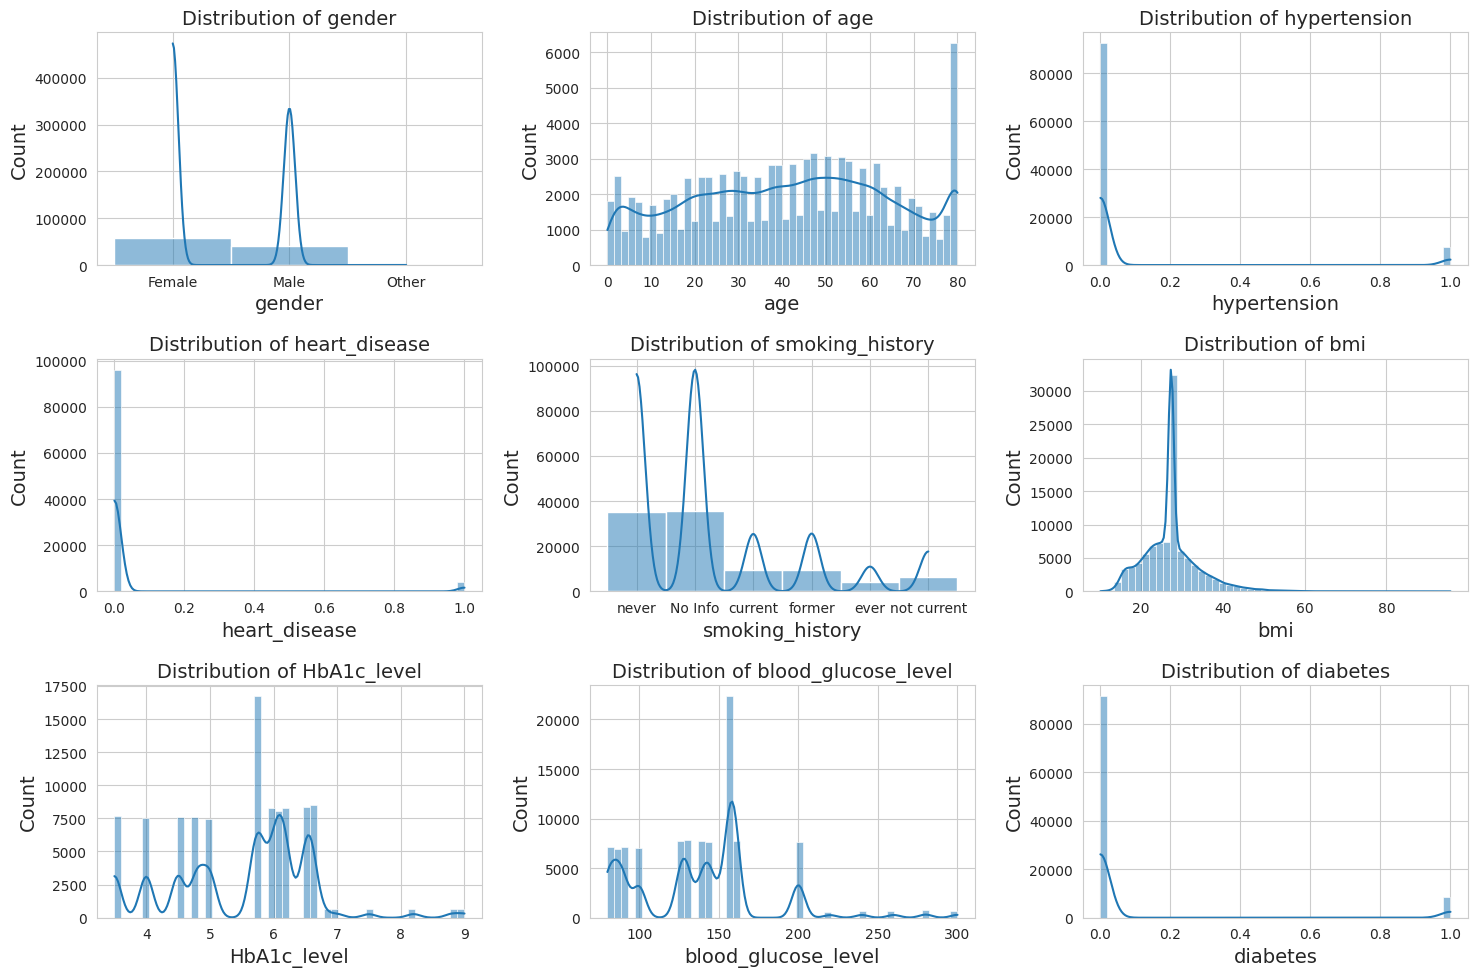

In [ ]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Create a histogram for each feature
for i, col in enumerate(df.columns):
    sns.histplot(df[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    if col == 'category':
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Remove any empty subplots
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


## Data Validation

In [ ]:
# duplicates
print("number of duplicate rows: ", df.duplicated().sum())

number of duplicate rows:  3854


In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
# unique values
print('number of distinct values per feature:')
nunique_values = df.nunique().reset_index().rename(columns={'index': 'feature', 0: 'nunique_values'})
nunique_values

number of distinct values per feature:


,feature,nunique_values
0,gender,3
1,age,102
2,hypertension,2
3,heart_disease,2
4,smoking_history,6
5,bmi,4247
6,HbA1c_level,18
7,blood_glucose_level,18
8,diabetes,2


In [ ]:
# missing values
print('number of missing values per feature:')
df.isnull().sum().reset_index().rename(columns={'index': 'feature', 0: 'missing_values'})

number of missing values per feature:


,feature,missing_values
0,gender,0
1,age,0
2,hypertension,0
3,heart_disease,0
4,smoking_history,0
5,bmi,0
6,HbA1c_level,0
7,blood_glucose_level,0
8,diabetes,0


## Univariate Analysis of Features

### Gender

In [ ]:
df.gender.value_counts(normalize=False)

,count
gender,
Female,58552
Male,41430
Other,18


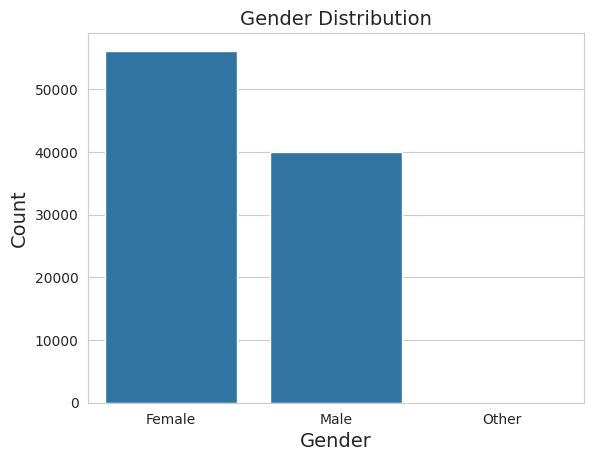

In [ ]:
# Bar plot for gender distribution
sns.countplot(data=df, x='gender')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


In [ ]:
df.drop(df[df['gender'] == 'Other'].index, inplace=True)
df.gender.value_counts(normalize=True)

,proportion
gender,
Female,0.584231
Male,0.415769


### Age

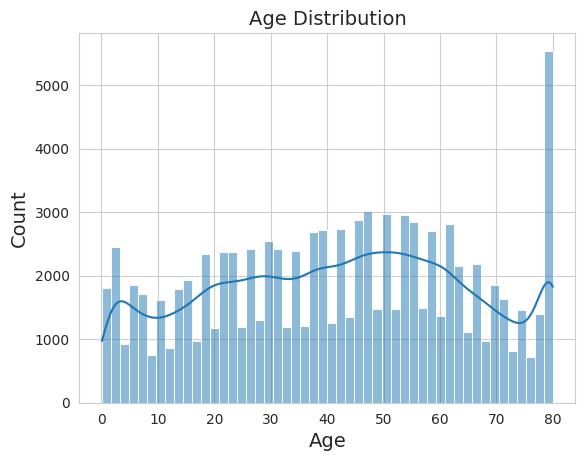

In [ ]:
sns.histplot(df.age, bins=50, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

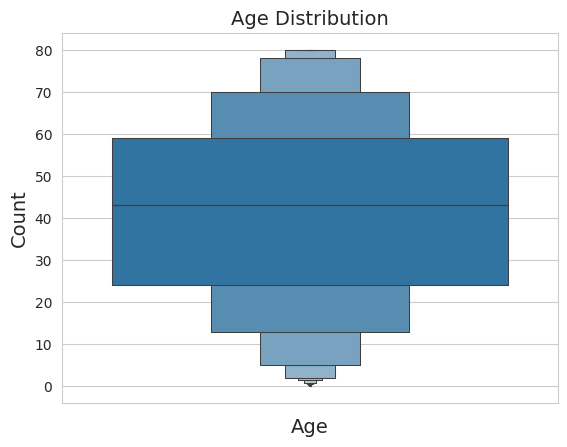

In [ ]:
sns.boxenplot(df.age)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### hypertension

In [ ]:
df.hypertension.value_counts()

,count
hypertension,
0,88667
1,7461


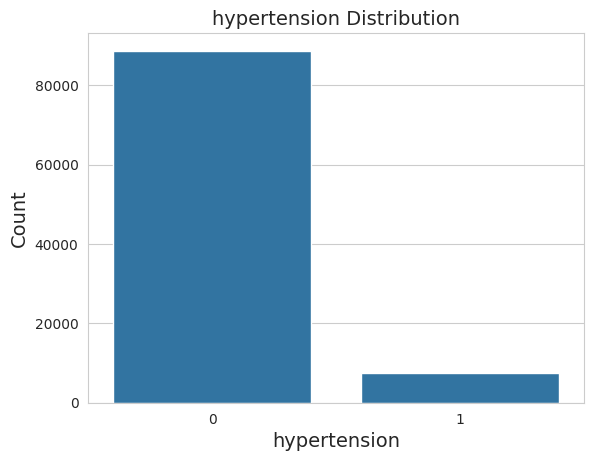

In [ ]:
sns.countplot(data=df, x='hypertension')
plt.title("hypertension Distribution")
plt.xlabel("hypertension")
plt.ylabel("Count")
plt.show()

### heart_disease


In [ ]:
df.heart_disease.value_counts()

,count
heart_disease,
0,92205
1,3923


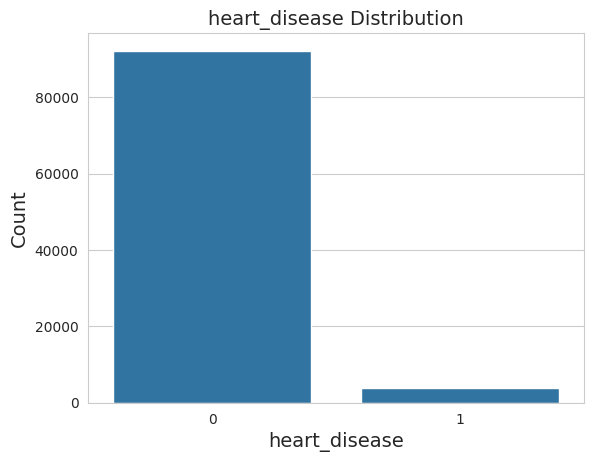

In [ ]:
sns.countplot(data=df, x='heart_disease')
plt.title("heart_disease Distribution")
plt.xlabel("heart_disease")
plt.ylabel("Count")
plt.show()

### smoking_history

In [ ]:
df.smoking_history.value_counts()

,count
smoking_history,
never,34395
No Info,32881
former,9299
current,9197
not current,6359
ever,3997


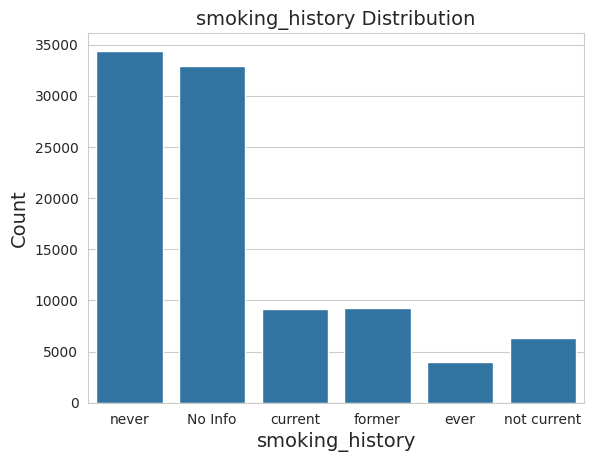

In [ ]:
sns.countplot(data=df, x='smoking_history')
plt.title("smoking_history Distribution")
plt.xlabel("smoking_history")
plt.ylabel("Count")
plt.show()

In [ ]:
# Group similar categories
df['smoking_history'] = df['smoking_history'].replace({
    'not current': 'former',
    'ever': 'former',
})

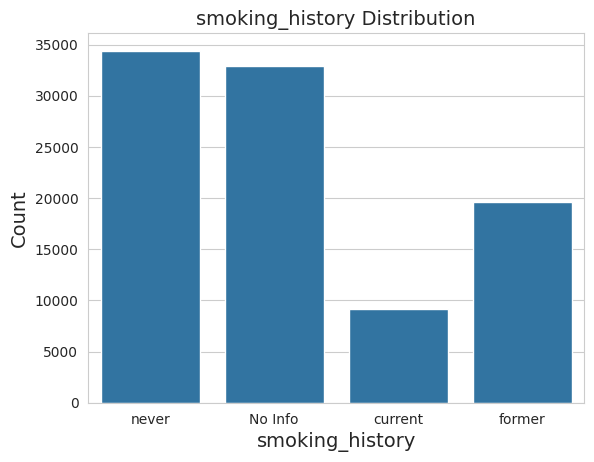

In [ ]:
sns.countplot(data=df, x='smoking_history')
plt.title("smoking_history Distribution")
plt.xlabel("smoking_history")
plt.ylabel("Count")
plt.show()

### bmi


In [ ]:
df.bmi.describe()

,bmi
count,96128.000000
mean,27.321450
std,6.767811
min,10.010000
25%,23.400000
50%,27.320000
75%,29.860000
max,95.690000


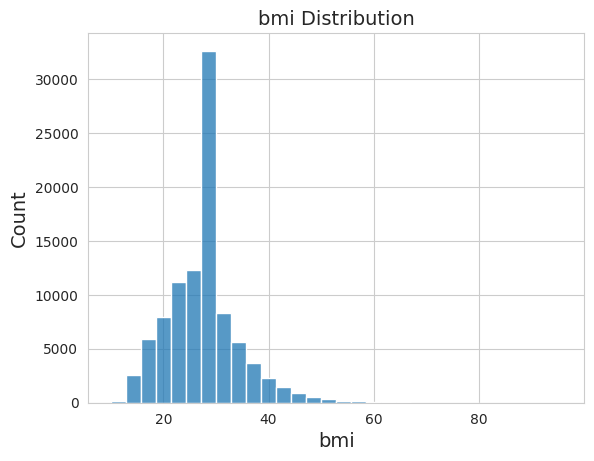

In [ ]:
sns.histplot(df.bmi, bins=30)
plt.title("bmi Distribution")
plt.xlabel("bmi")
plt.ylabel("Count")
plt.show()

### HbA1c_level


In [ ]:
df.HbA1c_level.value_counts()

,count
HbA1c_level,
6.6,8161
5.7,8123
6.5,8051
5.8,7992
6.0,7987
6.2,7956
6.1,7712
3.5,7316
4.8,7296


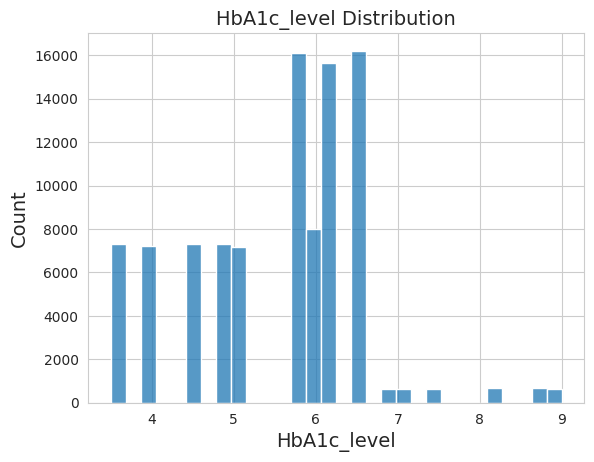

In [ ]:
sns.histplot(df.HbA1c_level, bins=30)
plt.title("HbA1c_level Distribution")
plt.xlabel("HbA1c_level")
plt.ylabel("Count")
plt.show()

### blood_glucose_level


In [ ]:
df.blood_glucose_level.value_counts()

,count
blood_glucose_level,
159,7475
130,7471
126,7419
140,7414
160,7393
145,7371
200,7289
155,7285
90,6820


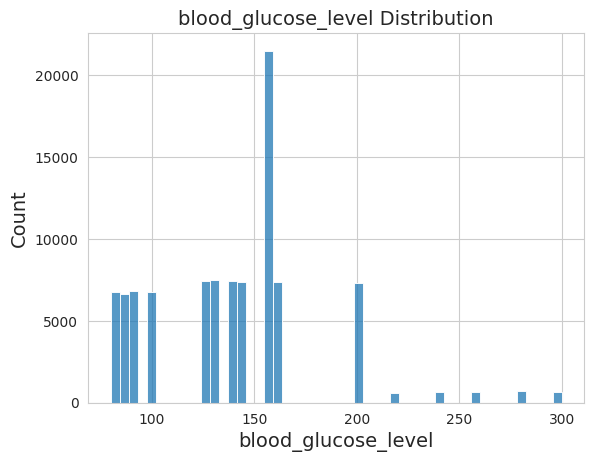

In [ ]:
sns.histplot(df.blood_glucose_level, bins=50)
plt.title("blood_glucose_level Distribution")
plt.xlabel("blood_glucose_level")
plt.ylabel("Count")
plt.show()

### diabetes

In [ ]:
df.diabetes.value_counts()

,count
diabetes,
0,87646
1,8482


-  Target variable is **imbalance**, with 87,646 non-diabetic cases (0) and only 8,482 diabetic cases (1). This type of class imbalance can affect the performance of machine learning models, as the model may be biased toward predicting the majority class (non-diabetic)

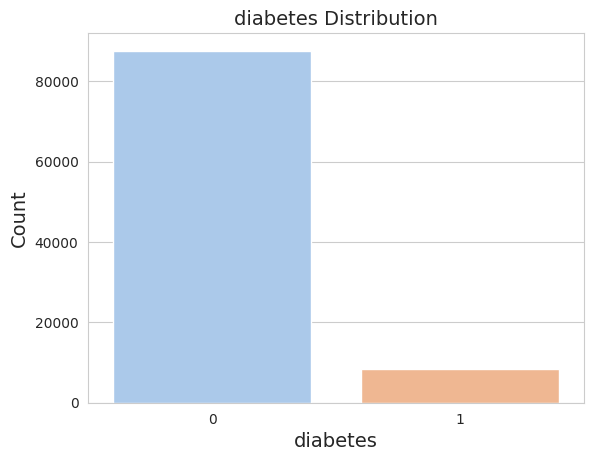

In [ ]:
sns.countplot(data=df, x='diabetes', palette='pastel', hue='diabetes', legend=False)
plt.title("diabetes Distribution")
plt.xlabel("diabetes")
plt.ylabel("Count")
plt.show()

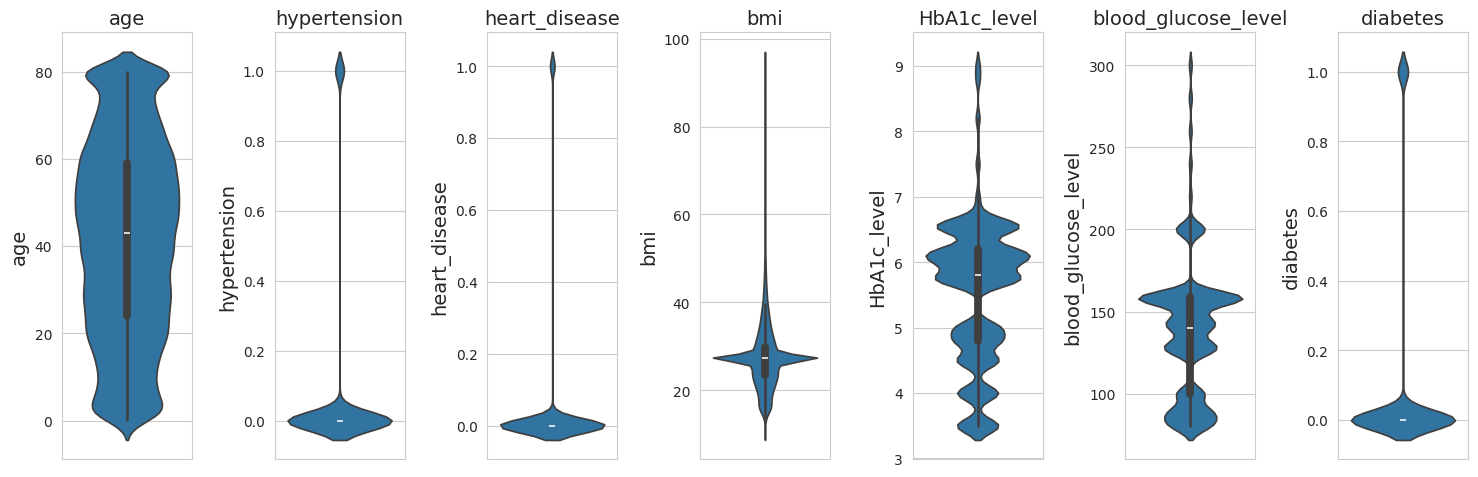

In [ ]:
# numerical columns
numerical_columns = df.select_dtypes(include='number').columns

# violinplot for each numerical feature
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 5))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.violinplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'{col}')

plt.tight_layout()
plt.show()


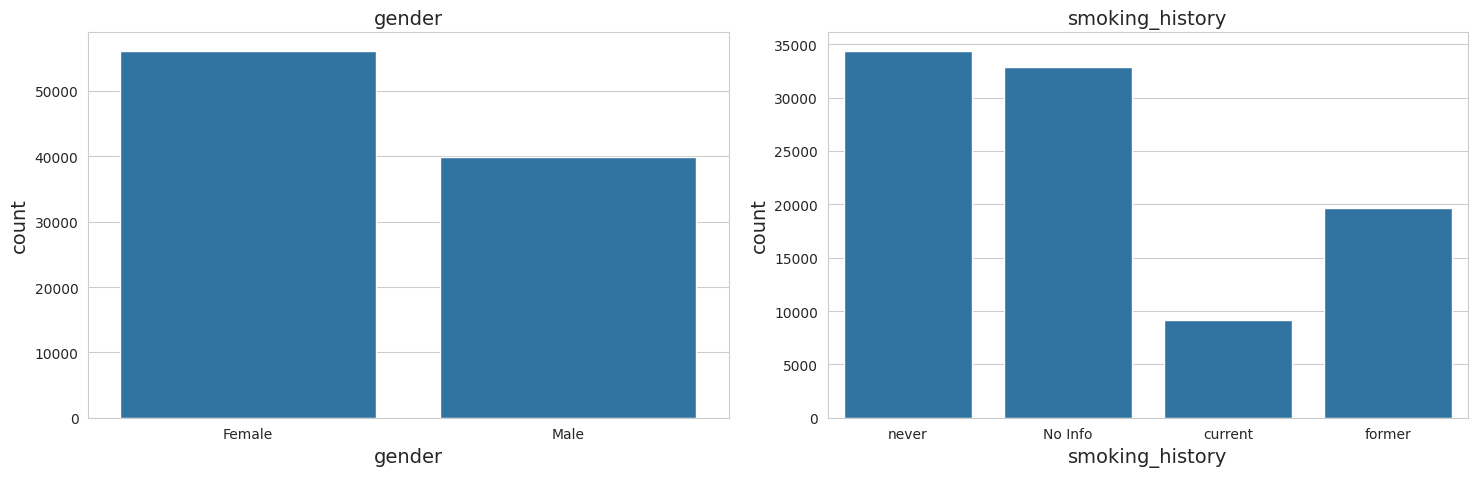

In [ ]:
# categorical_columns
categorical_columns = df.select_dtypes(include='object').columns

sns.set_style('whitegrid')
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(15, 5))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'{col}')

plt.tight_layout()
plt.show()


## Bivariate Analysis with the Target Variable (diabetes)

### numerical features

In [ ]:
numerical_columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
numerical_4columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

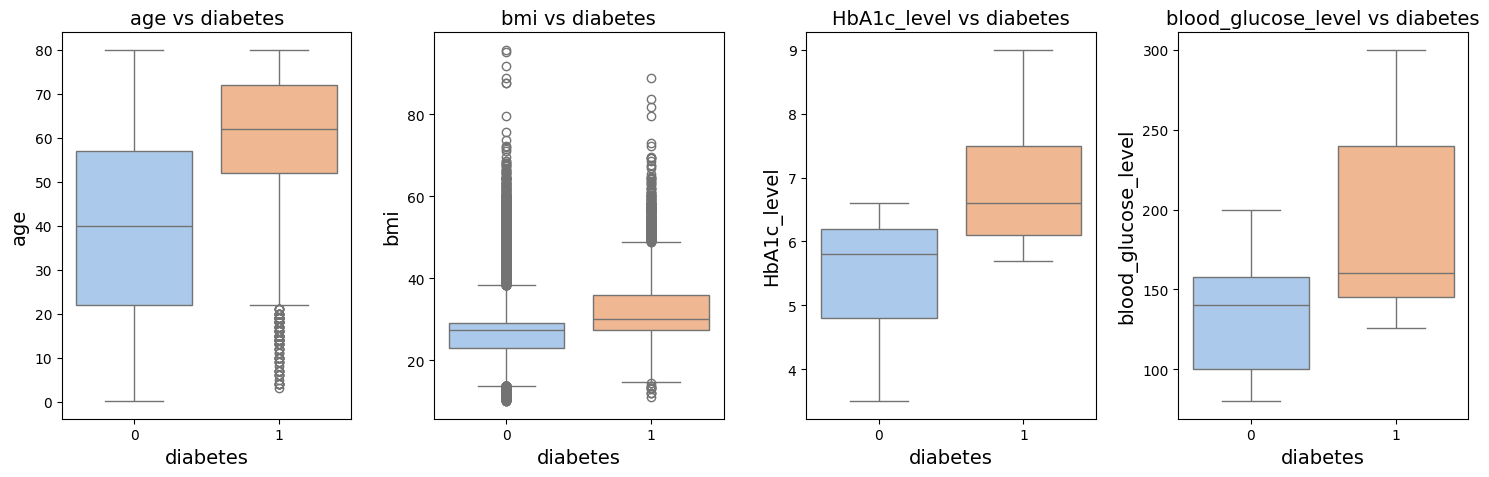

In [ ]:
# boxplot for numerical features against target variable
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_4columns), figsize=(15, 5))
axes = axes.flatten()

for i, col in enumerate(numerical_4columns):
    sns.boxplot(x='diabetes', y=col, data=df, ax=axes[i], palette='pastel', hue='diabetes', legend=False)
    axes[i].set_title(f'{col} vs diabetes')

plt.tight_layout()
plt.show()

In [ ]:
df.groupby('diabetes')[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].mean()

,age,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,
0,39.945362,26.868898,5.396934,132.817128
1,60.925961,31.997755,6.934827,194.026173


The statistics and boxplot for age, BMI, HbA1c level, and blood glucose level across diabetic (1) and non-diabetic (0) individuals provide valuable insights:

- **Age**: Diabetic individuals have an average age of 60.93 years, whereas non-diabetic individuals are younger, with an average age of 39.95 years. This suggests that age is a key risk factor, with older individuals being more likely to develop diabetes.

- **BMI** (Body Mass Index): Diabetic individuals have an average BMI of 31.99, indicating obesity, which is a well-known risk factor for type 2 diabetes. Non-diabetic individuals have a lower average BMI of 26.87, which falls into the "overweight" range but is not classified as obese.

- **HbA1c Level**: The HbA1c level for diabetics averages 6.93%, whereas for non-diabetics, it's lower at 5.40%. This aligns with medical standards where an HbA1c level of 6.5% or higher is diagnostic for diabetes, indicating poor blood sugar control in diabetics.

- **Blood Glucose Level**: Diabetic individuals have higher average blood glucose levels (194.03 mg/dL) compared to non-diabetic individuals (132.82 mg/dL), which reflects the condition's characteristic of elevated blood sugar levels.

These features—age, BMI, HbA1c, and blood glucose—are strong indicators of diabetes, and can be utilized for building predictive models.

### binary and categorical features

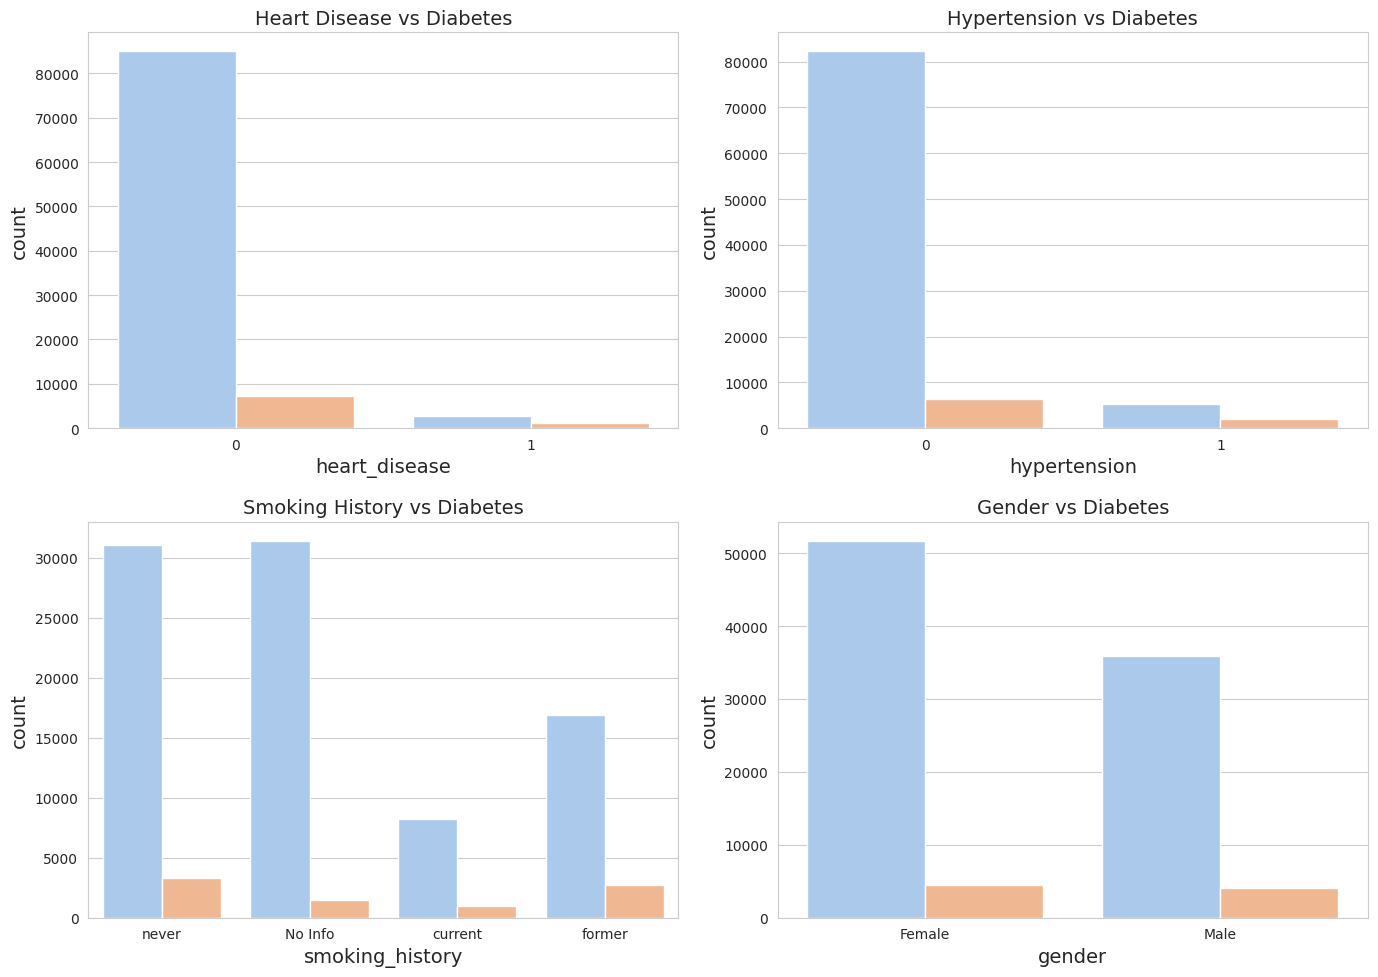

In [ ]:
# boxplot for binary and categorical features against target variable
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.countplot(data=df, x='heart_disease', hue='diabetes', ax=axes[0, 0], palette='pastel', legend=False)
axes[0, 0].set_title('Heart Disease vs Diabetes')

sns.countplot(data=df, x='hypertension', hue='diabetes', ax=axes[0, 1], palette='pastel', legend=False)
axes[0, 1].set_title('Hypertension vs Diabetes')

sns.countplot(data=df, x='smoking_history', hue='diabetes', ax=axes[1, 0], palette='pastel', legend=False)
axes[1, 0].set_title('Smoking History vs Diabetes')

sns.countplot(data=df, x='gender', hue='diabetes', ax=axes[1, 1], palette='pastel', legend=False)
axes[1, 1].set_title('Gender vs Diabetes')

plt.tight_layout()
plt.show()


In [ ]:
# Proportion of diabetes for each gender
gender_proportion = df.groupby('gender')['diabetes'].value_counts(normalize=True).unstack().fillna(0)
gender_proportion

diabetes,0,1
gender,,
Female,0.920817,0.079183
Male,0.899042,0.100958


In [ ]:
# Proportion of diabetes for each smoking history category
smoking_proportion = df.groupby('smoking_history')['diabetes'].value_counts(normalize=True).unstack().fillna(0)
smoking_proportion

diabetes,0,1
smoking_history,,
No Info,0.956054,0.043946
current,0.896923,0.103077
former,0.859985,0.140015
never,0.902980,0.097020


In [ ]:
pd.crosstab(df['gender'], df['diabetes'])

diabetes,0,1
gender,,
Female,51714,4447
Male,35932,4035


In [ ]:
pd.crosstab(df['smoking_history'], df['diabetes'])

diabetes,0,1
smoking_history,,
No Info,31436,1445
current,8249,948
former,16903,2752
never,31058,3337


In [ ]:
from scipy.stats import chi2_contingency

# Chi-square test for gender vs diabetes
gender_crosstab = pd.crosstab(df['gender'], df['diabetes'])
chi2, p, dof, expected = chi2_contingency(gender_crosstab)
print(f'Chi-square test for gender vs diabetes: p-value = {p}')

# Chi-square test for smoking history vs diabetes
smoking_crosstab = pd.crosstab(df['smoking_history'], df['diabetes'])
chi2, p, dof, expected = chi2_contingency(smoking_crosstab)
print(f'Chi-square test for smoking history vs diabetes: p-value = {p}')


Chi-square test for gender vs diabetes: p-value = 1.0112949442961092e-31
Chi-square test for smoking history vs diabetes: p-value = 0.0


- Both results suggest that gender and smoking history are important factors to consider when predicting diabetes status. Given the low p-values, these variables are likely to be significant predictors in a logistic regression model.

In [ ]:
pd.crosstab(df['heart_disease'], df['diabetes'])

diabetes,0,1
heart_disease,,
0,84990,7215
1,2656,1267


In [ ]:
pd.crosstab(df['hypertension'], df['diabetes'])

diabetes,0,1
hypertension,,
0,82271,6396
1,5375,2086


In [ ]:
from scipy.stats import chi2_contingency

# Chi-square test for gender vs diabetes
heart_disease_crosstab = pd.crosstab(df['heart_disease'], df['diabetes'])
chi2, p, dof, expected = chi2_contingency(gender_crosstab)
print(f'Chi-square test for heart_disease vs diabetes: p-value = {p}')

# Chi-square test for smoking history vs diabetes
hypertension_crosstab = pd.crosstab(df['hypertension'], df['diabetes'])
chi2, p, dof, expected = chi2_contingency(smoking_crosstab)
print(f'Chi-square test for hypertension vs diabetes: p-value = {p}')


Chi-square test for heart_disease vs diabetes: p-value = 1.0112949442961092e-31
Chi-square test for hypertension vs diabetes: p-value = 0.0


- These results indicate that both heart disease and hypertension are significant risk factors for diabetes, and should be considered when developing a predictive model for diabetes.



## Multivariate analysis

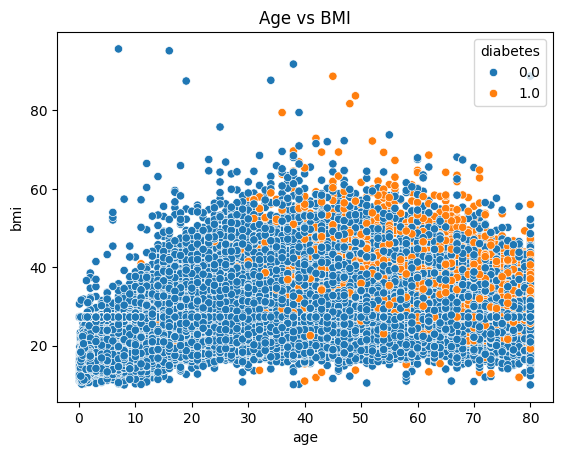

In [ ]:
# Scatterplot Age vs BMI colored by Diabetes classification
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df)
plt.title('Age vs BMI')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


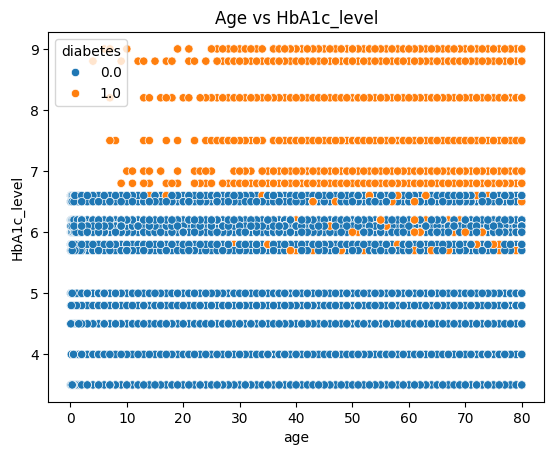

In [ ]:
sns.scatterplot(x='age', y='HbA1c_level', hue='diabetes', data=df)
plt.title('Age vs HbA1c_level')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


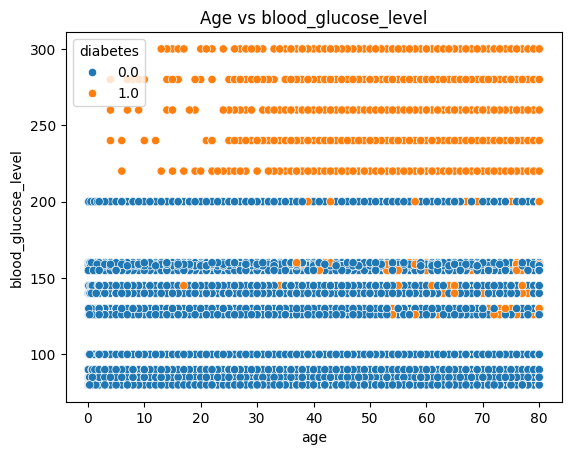

In [ ]:
sns.scatterplot(x='age', y='blood_glucose_level', hue='diabetes', data=df)
plt.title('Age vs blood_glucose_level')
plt.show()

## Correlation

In [ ]:
# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder on the categorical columns
encoder.fit(df[['gender', 'smoking_history']])
encoded_features = encoder.transform(df[['gender', 'smoking_history']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['gender', 'smoking_history']))

encoded_df.head()

,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_former,smoking_history_never
0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
# Concatenate the encoded features with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)
df.drop(['gender', 'smoking_history'], axis=1, inplace=True)
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_former,smoking_history_never
0,80.0,0.0,1.0,25.19,6.6,140.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,54.0,0.0,0.0,27.32,6.6,80.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,28.0,0.0,0.0,27.32,5.7,158.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,36.0,0.0,0.0,23.45,5.0,155.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,76.0,1.0,1.0,20.14,4.8,155.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


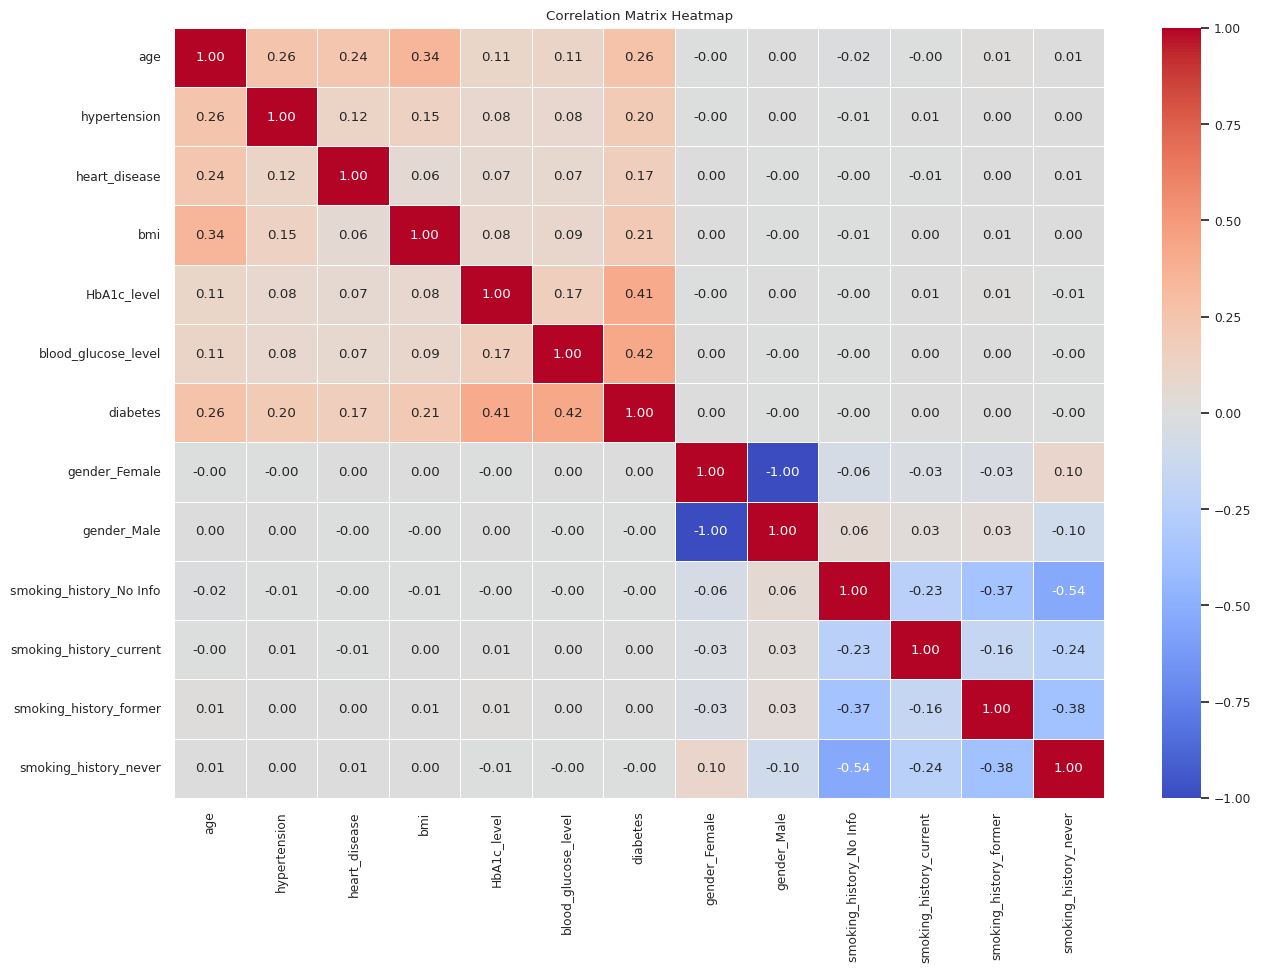

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

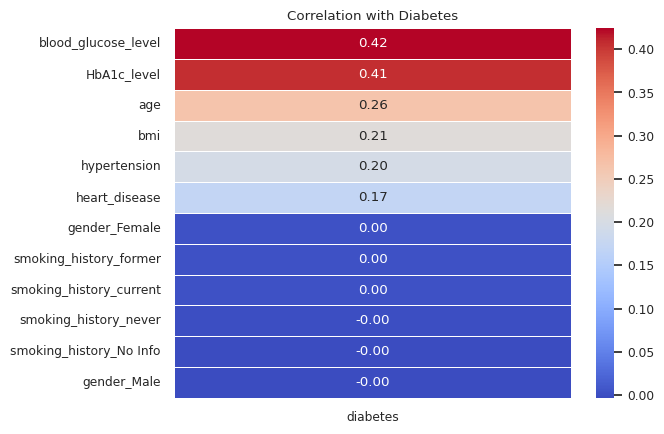

In [ ]:
target_corr = corr_matrix['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.heatmap(target_corr_sorted.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation with Diabetes")
plt.show()

- `Blood Glucose Level` and `HbA1c Level` have **the strongest positive correlations** with diabetes, at 0.424366 and 0.406446 respectively. This suggests that higher blood glucose and HbA1c levels are strongly associated with the presence of diabetes.
- `Age` also has a **moderate positive correlation** with diabetes at 0.264918. This indicates that as age increases, the likelihood of having diabetes also tends to increase.
- `BMI` has a positive correlation of 0.214951 with diabetes, suggesting that higher BMI values are associated with a greater risk of developing diabetes.
- `Hypertension` has a relatively weaker but still positive correlation of 0.195696 with diabetes. This means that the presence of hypertension is moderately linked to the presence of diabetes as well.
- `Heart disease` has the lowest correlation at 0.170701, indicating a relatively weaker association between heart disease and diabetes compared to the other factors.
- `Gender` does not show a strong correlation with diabetes, with the female-male difference being very small at 0.003320.
- `Smoking history` shows minimal to no correlation with diabetes, with the strongest link being a very small positive correlation of 0.002964 for current smokers.

## EDA Summary
#### **Data Overview:**

- The dataset contains 100,000 entries with 9 features, including demographic, medical, and lifestyle data, such as age, gender, hypertension, heart disease, bmi, HbA1c level, blood glucose level, smoking history, and diabetes status (target variable).
- The target variable, diabetes, is highly imbalanced, with 87,646 non-diabetic cases (0) and 8,482 diabetic cases (1).

#### **Data Cleaning:**

- Duplicates: 3,854 duplicate rows were removed from the dataset.
- Gender: The "Other" category in the gender column was removed to simplify analysis, leaving only Male and Female.
- Smoking History: The categories "not current" and "ever" were consolidated into "former" to reduce category complexity.

#### **Bivariate Analysis:**
- BMI, HbA1c Level, Blood Glucose Level: Diabetic patients have higher average values in these metrics compared to non-diabetic individuals.
- Gender and Diabetes: A significant association was found between gender and diabetes, with males having a slightly higher prevalence of diabetes than females.
- Smoking History and Diabetes: The relationship between smoking history and diabetes was also significant, with a higher proportion of diabetics among individuals with a smoking history.
- Hypertension and Heart Disease: Both of these factors showed a strong correlation with diabetes, with individuals suffering from hypertension and heart disease being more likely to develop diabetes.

#### **Correlation Results:**
- The bivariate analysis findings broadly align with the correlation results, providing complementary insights into the relationships between the various risk factors and diabetes.

# Prepare the Data for Models

## data prep

In [10]:
df = data.copy()

# data cleaning
df.drop(df[df['gender'] == 'Other'].index, inplace=True)
df.drop_duplicates(inplace=True)

df['smoking_history'] = df['smoking_history'].replace({
    'not current': 'former',
    'ever': 'former',

})


## Train and Test Data

In [11]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_set.shape, test_set.shape

((76902, 9), (19226, 9))

In [12]:
# num pipeline
num_pipeline = make_pipeline(StandardScaler())

# cat pipeline
cat_pipeline = make_pipeline(OneHotEncoder(sparse_output=False))

# full pipeline
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

preprocessing

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7b666bb59bd0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7b666bb58390>)])

In [13]:
# spliting the data
X = df.drop('diabetes', axis=1)
y = df['diabetes']

X_processed = preprocessing.fit_transform(X)
X_processed_df = pd.DataFrame(X_processed, columns=preprocessing.get_feature_names_out())

X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((76902, 12), (76902,), (19226, 12), (19226,))

In [ ]:
X_processed_df.head()

,pipeline-1__age,pipeline-1__hypertension,pipeline-1__heart_disease,pipeline-1__bmi,pipeline-1__HbA1c_level,pipeline-1__blood_glucose_level,pipeline-2__gender_Female,pipeline-2__gender_Male,pipeline-2__smoking_history_No Info,pipeline-2__smoking_history_current,pipeline-2__smoking_history_former,pipeline-2__smoking_history_never
0,1.700709,-0.290080,4.848061,-0.314941,0.994547,0.043558,1.0,0.0,0.0,0.0,0.0,1.0
1,0.543261,-0.290080,-0.206268,-0.000214,0.994547,-1.423041,1.0,0.0,1.0,0.0,0.0,0.0
2,-0.614187,-0.290080,-0.206268,-0.000214,0.155949,0.483538,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.258049,-0.290080,-0.206268,-0.572042,-0.496294,0.410208,1.0,0.0,0.0,1.0,0.0,0.0
4,1.522640,3.447327,4.848061,-1.061124,-0.682649,0.410208,0.0,1.0,0.0,1.0,0.0,0.0


In [17]:
y_train.value_counts()

,count
diabetes,
0,70121
1,6781


# Class imbalance
The dataset is highly imbalanced, with only 9% positive cases for diabetes. To address this, we employ **SMOTE** to generate synthetic minority class samples and balance the dataset.

In [ ]:
df.diabetes.value_counts()

,count
diabetes,
0,87646
1,8482


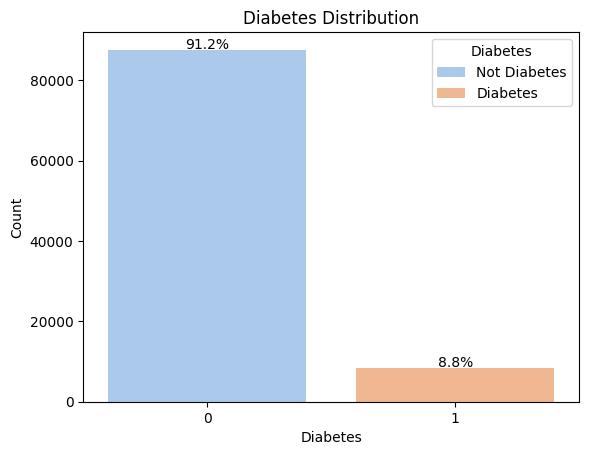

In [ ]:
diabetes_counts = df['diabetes'].value_counts()
percentages = diabetes_counts / diabetes_counts.sum() * 100

ax = sns.countplot(data=df, x='diabetes', palette='pastel', hue='diabetes', legend=False)
plt.title("Diabetes Distribution")
plt.xlabel("Diabetes")
plt.ylabel("Count")

for p, percentage in zip(ax.patches, percentages):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 300, f'{percentage:.1f}%', ha="center")

plt.legend(labels=['Not Diabetes', 'Diabetes'], title='Diabetes')
plt.show()

In [14]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Define resampling
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

In [15]:
sm = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_processed_df, y)

balanced_data = pd.concat([X_resampled, y_resampled], axis=1)
balanced_data.head()

,pipeline-1__age,pipeline-1__hypertension,pipeline-1__heart_disease,pipeline-1__bmi,pipeline-1__HbA1c_level,pipeline-1__blood_glucose_level,pipeline-2__gender_Female,pipeline-2__gender_Male,pipeline-2__smoking_history_No Info,pipeline-2__smoking_history_current,pipeline-2__smoking_history_former,pipeline-2__smoking_history_never,diabetes
0,1.700709,-0.290080,4.848061,-0.314941,0.994547,0.043558,1.0,0.0,0.0,0.0,0.0,1.0,0
1,0.543261,-0.290080,-0.206268,-0.000214,0.994547,-1.423041,1.0,0.0,1.0,0.0,0.0,0.0,0
2,-0.614187,-0.290080,-0.206268,-0.000214,0.155949,0.483538,0.0,1.0,0.0,0.0,0.0,1.0,0
3,-0.258049,-0.290080,-0.206268,-0.572042,-0.496294,0.410208,1.0,0.0,0.0,1.0,0.0,0.0,0
4,1.522640,3.447327,4.848061,-1.061124,-0.682649,0.410208,0.0,1.0,0.0,1.0,0.0,0.0,0


In [ ]:
X_resampled.shape, y_resampled.shape

((175292, 12), (175292,))

In [ ]:
balanced_data.diabetes.value_counts()

,count
diabetes,
0,87646
1,87646


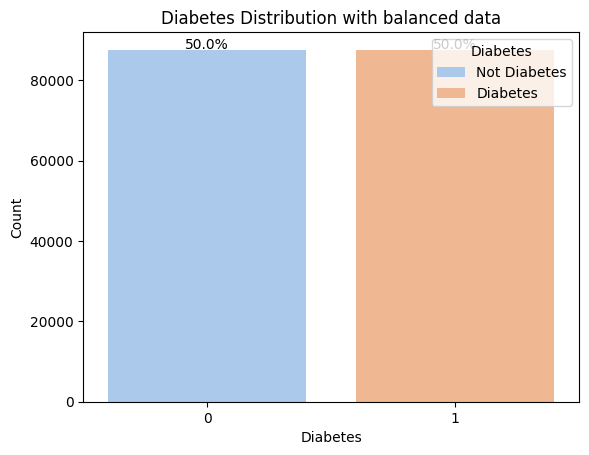

In [ ]:
diabetes_counts = balanced_data['diabetes'].value_counts()
percentages = diabetes_counts / diabetes_counts.sum() * 100

ax = sns.countplot(data=balanced_data, x='diabetes', palette='pastel', hue='diabetes', legend=False)
plt.title("Diabetes Distribution with balanced data")
plt.xlabel("Diabetes")
plt.ylabel("Count")

for p, percentage in zip(ax.patches, percentages):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 300, f'{percentage:.1f}%', ha="center")

plt.legend(labels=['Not Diabetes', 'Diabetes'], title='Diabetes')
plt.show()

In [19]:
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train_balanced.shape, y_train_balanced.shape, X_test_balanced.shape, y_test_balanced.shape

((140233, 12), (140233,), (35059, 12), (35059,))

# Implement Logistic Regression

In [20]:
class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        # Initialize weights
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)
        bias = 0

        for i in range(self.num_iterations):
            # Calculate predictions
            z = np.dot(X, self.weights) + bias
            h = self.sigmoid(z)

            # Gradient calculation
            dw = np.dot(X.T, (h - y)) / len(y)
            db = np.sum(h - y) / len(y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights)
        predictions = self.sigmoid(z)
        return (predictions >= 0.5).astype(int)

    def score(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)


### Train with Imbalanced Data

In [21]:
custom_log_reg = CustomLogisticRegression(learning_rate=0.01, num_iterations=1000)
%time custom_log_reg.fit(X_train, y_train)

CPU times: user 6.79 s, sys: 2.96 s, total: 9.75 s
Wall time: 5.03 s


In [23]:
custom_log_reg.score(X_test, y_test)

0.9124102777488817

In [25]:
cm_labels = ['Not Diabetes', 'Diabetes']

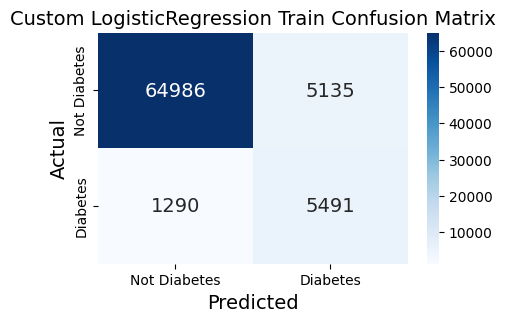

In [26]:
y_train_pred_custom = custom_log_reg.predict(X_train)
y_test_pred_custom = custom_log_reg.predict(X_test)

plot_confusion_matrix(y_train, y_train_pred_custom, labels=cm_labels, title='Custom LogisticRegression Train Confusion Matrix')

In [27]:
custom_log_metrices_df = classification_metrics_df(y_train, y_train_pred_custom, y_test, y_test_pred_custom, 'Custom LogisticRegression')
custom_log_metrices_df

,Metric,Train Set,Test Set,Model
0,Accuracy,0.92,0.91,Custom LogisticRegression
1,Precision,0.52,0.50,Custom LogisticRegression
2,Recall,0.81,0.80,Custom LogisticRegression
3,F1 Score,0.63,0.62,Custom LogisticRegression


In [28]:
plot_metrics_with_plotly(custom_log_metrices_df)

In [ ]:
pd.DataFrame(custom_log_reg.weights, index=X_processed_df.columns, columns=['Weight']).sort_values(by='Weight', ascending=False)

,Weight
pipeline-1__HbA1c_level,0.545373
pipeline-1__blood_glucose_level,0.532605
pipeline-1__age,0.263690
pipeline-1__bmi,0.215413
pipeline-1__hypertension,0.156539
pipeline-1__heart_disease,0.128106
pipeline-2__smoking_history_current,-0.135366
pipeline-2__smoking_history_former,-0.234566
pipeline-2__smoking_history_never,-0.405210
pipeline-2__smoking_history_No Info,-0.467596


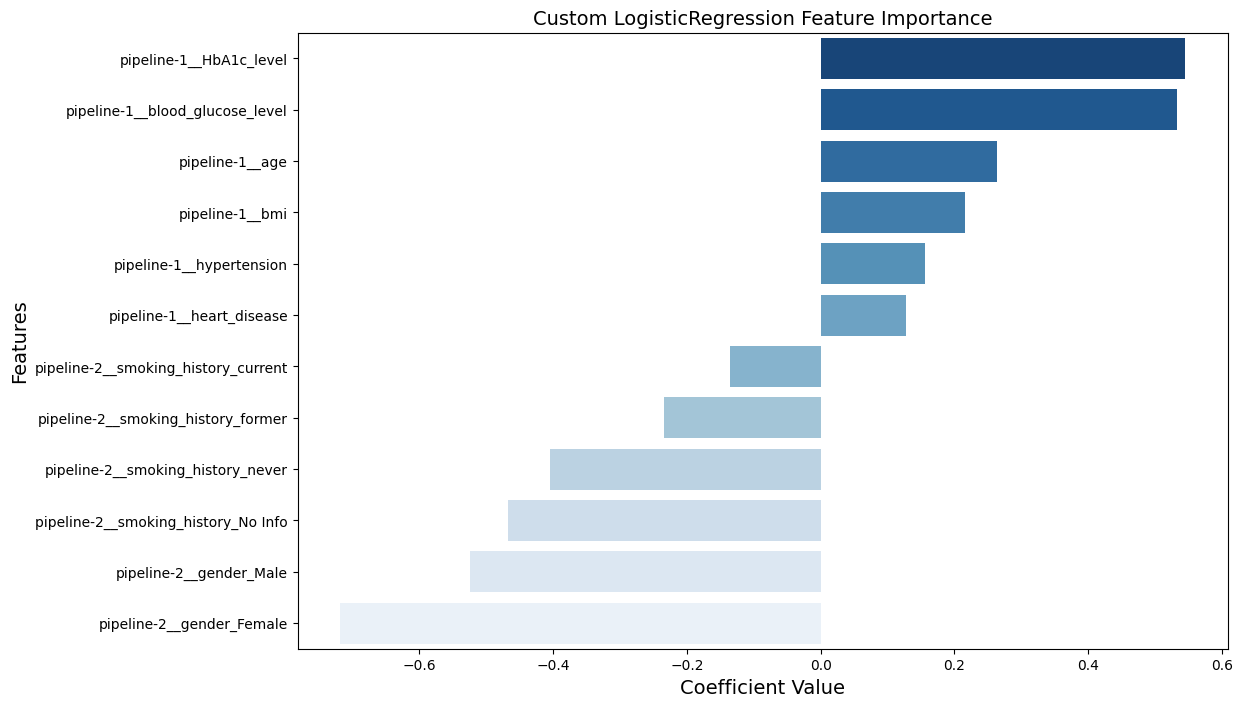

In [29]:
plot_feature_importance(custom_log_reg.weights, X_processed_df.columns, 'Custom LogisticRegression')

###Findings
- **Accuracy** is high (92% on the training set, 91% on the test set), indicating the model performs well overall.
- **Precision is relatively low** (~50%), which might suggest the model misclassifies some negative samples as positive (false positives).
- **Recall** is significantly higher (~80%), showing the model captures most positive cases correctly, but may include some false positives.
- F1 Score (harmonic mean of precision and recall) is moderate, reflecting the tradeoff between precision and recall.
- The model suggests that clinical indicators such as HbA1c and blood glucose levels are most critical in predicting diabetes, while factors like smoking history and gender provide limited additional predictive power.

### Hyperparameter Tuning

In [31]:
learning_rates = [0.001, 0.01, 0.1]
num_iterations = [500, 1000, 2000]

best_score = 0
best_params = {}

for lr in learning_rates:
    for iters in num_iterations:
        model = CustomLogisticRegression(learning_rate=lr, num_iterations=iters)
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_params = {"learning_rate": lr, "num_iterations": iters}

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'learning_rate': 0.001, 'num_iterations': 1000}
Best Score: 0.9323312181420993


In [32]:
custom_log_reg_gs = CustomLogisticRegression(learning_rate=best_params['learning_rate'], num_iterations=best_params['num_iterations'])
%time custom_log_reg_gs.fit(X_train, y_train)

CPU times: user 6.95 s, sys: 3.26 s, total: 10.2 s
Wall time: 6.74 s


In [33]:
custom_log_reg_gs.score(X_test, y_test)

0.9323312181420993

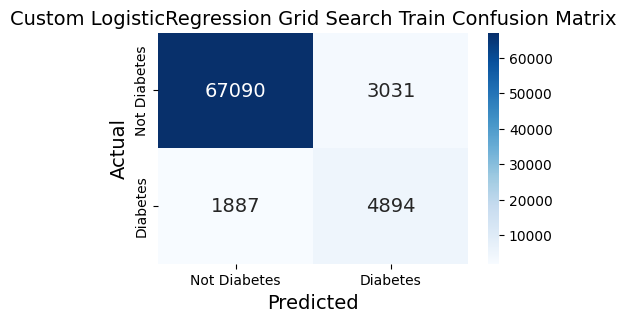

In [34]:
y_train_pred_custom_gs = custom_log_reg_gs.predict(X_train)
y_test_pred_custom_gs = custom_log_reg_gs.predict(X_test)

plot_confusion_matrix(y_train, y_train_pred_custom_gs, labels=cm_labels, title='Custom LogisticRegression Grid Search Train Confusion Matrix')

In [ ]:
custom_log_reg_gs_metrices_df = classification_metrics_df(y_train, y_train_pred_custom_gs, y_test, y_test_pred_custom_gs, 'Custom LogisticRegression Grid Search')
custom_log_reg_gs_metrices_df

,Metric,Train Set,Test Set,Model
0,Accuracy,0.94,0.93,Custom LogisticRegression Grid Search
1,Precision,0.62,0.60,Custom LogisticRegression Grid Search
2,Recall,0.72,0.70,Custom LogisticRegression Grid Search
3,F1 Score,0.67,0.65,Custom LogisticRegression Grid Search


In [ ]:
plot_metrics_with_plotly(custom_log_reg_gs_metrices_df)

- These optimal parameters resulted in the best model score of 0.932, indicating an improvement in model performance.

### Train with balanced Data

In [35]:
custom_log_bal = CustomLogisticRegression(learning_rate=0.001, num_iterations=1000)
%time custom_log_bal.fit(X_train_balanced, y_train_balanced)

CPU times: user 20.8 s, sys: 12.7 s, total: 33.6 s
Wall time: 21.5 s


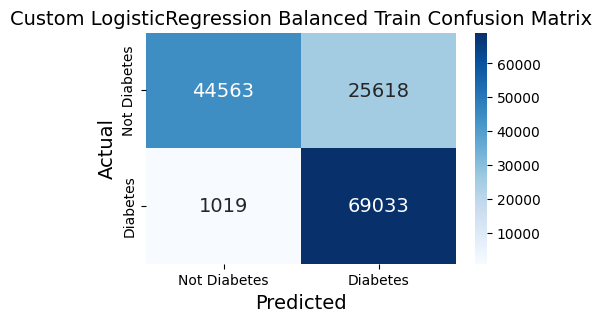

In [36]:
y_train_pred_custom_bal = custom_log_bal.predict(X_train_balanced)
y_test_pred_custom_bal = custom_log_bal.predict(X_test_balanced)

plot_confusion_matrix(y_train_balanced, y_train_pred_custom_bal, labels=cm_labels, title='Custom LogisticRegression Balanced Train Confusion Matrix')

In [37]:
custom_log_bal_metrices_df = classification_metrics_df(y_train_balanced, y_train_pred_custom_bal, y_test_balanced, y_test_pred_custom_bal, 'Custom LogisticRegression Balanced')
custom_log_bal_metrices_df

,Metric,Train Set,Test Set,Model
0,Accuracy,0.81,0.81,Custom LogisticRegression Balanced
1,Precision,0.73,0.73,Custom LogisticRegression Balanced
2,Recall,0.99,0.99,Custom LogisticRegression Balanced
3,F1 Score,0.84,0.84,Custom LogisticRegression Balanced


In [ ]:
plot_metrics_with_plotly(custom_log_bal_metrices_df)

### Summary

In [ ]:
custom_log_metrics_df_list = [custom_log_metrices_df, custom_log_reg_gs_metrices_df, custom_log_bal_metrices_df]
custom_log_combined_metrics_df = combine_and_format_metrics(custom_log_metrics_df_list)
custom_log_combined_metrics_df

,Model,Accuracy Train Set,F1 Score Train Set,Precision Train Set,Recall Train Set,Accuracy Test Set,F1 Score Test Set,Precision Test Set,Recall Test Set
0,Custom LogisticRegression,0.92,0.63,0.52,0.81,0.91,0.62,0.50,0.80
1,Custom LogisticRegression Balanced,0.81,0.84,0.73,0.99,0.81,0.84,0.73,0.99
2,Custom LogisticRegression Grid Search,0.94,0.67,0.62,0.72,0.93,0.65,0.60,0.70


In [ ]:
plot_model_metrics_with_size(custom_log_combined_metrics_df)

# Logistic Regression
We train a scikit-learn Logistic Regression model and compare the results against our implementation

In [38]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
%time log_reg.fit(X_train, y_train)

CPU times: user 125 ms, sys: 61.7 ms, total: 187 ms
Wall time: 115 ms


LogisticRegression()

In [39]:
y_train_pred_log = log_reg.predict(X_train)
y_test_pred_log = log_reg.predict(X_test)

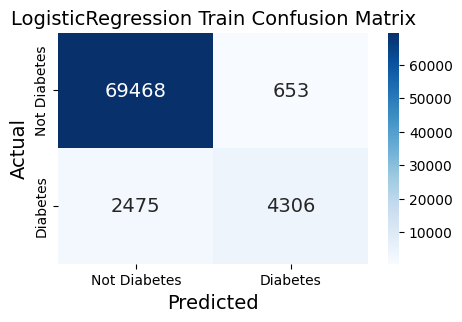

In [40]:
plot_confusion_matrix(y_train, y_train_pred_log, labels=cm_labels, title='LogisticRegression Train Confusion Matrix')

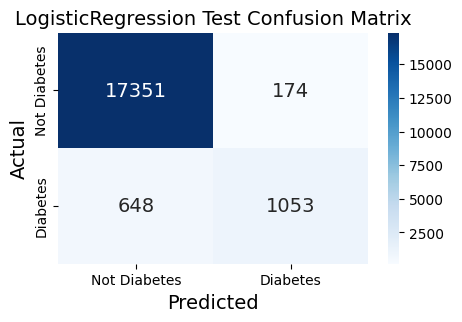

In [41]:
plot_confusion_matrix(y_test, y_test_pred_log, labels=cm_labels, title='LogisticRegression Test Confusion Matrix')

In [ ]:
log_metrices_df = classification_metrics_df(y_train, y_train_pred_log, y_test, y_test_pred_log, 'LogisticRegression')
log_metrices_df

,Metric,Train Set,Test Set,Model
0,Accuracy,0.96,0.96,LogisticRegression
1,Precision,0.87,0.86,LogisticRegression
2,Recall,0.64,0.62,LogisticRegression
3,F1 Score,0.73,0.72,LogisticRegression


In [ ]:
plot_metrics_with_plotly(log_metrices_df)

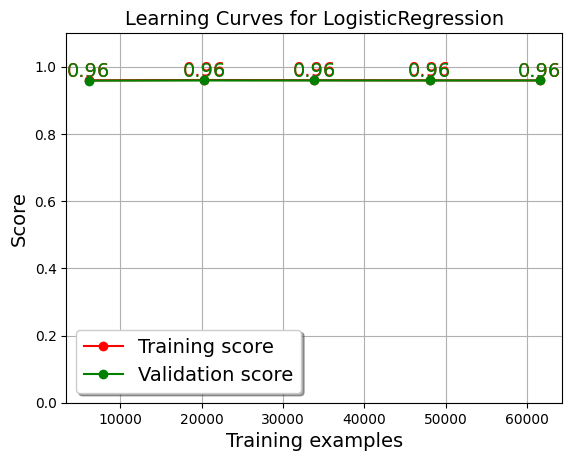

In [ ]:
plot_learning_curves(log_reg, X_train, y_train, model_name = 'LogisticRegression')

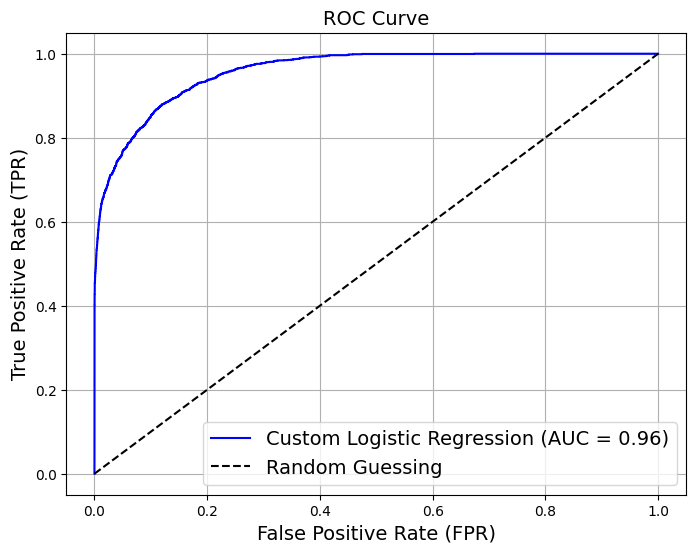

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score

# Step 1: Get predicted probabilities for the positive class (1)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Assuming predict_proba outputs a 2D array

# Step 2: Calculate FPR, TPR, and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Step 3: Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")  # Diagonal line for random guessing
plt.title("ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend()
plt.grid()
plt.show()


### Findings
- High accuracy of 0.96 on both train and test sets, indicating **the model generalizes well**
- **Strong precision** of 0.87 on train and 0.86 on test, meaning it correctly identifies positive instances with high confidence
- Relatively **lower recall** of 0.64 on train and 0.62 on test, suggesting the model may be missing some positive instances
- F1 score of 0.73 on train and 0.72 on test, indicating reasonably good overall performance that balances precision and recall
- The high accuracy and precision are strengths, but the **lower recall indicates potential room for improvement** by tuning the model or engineering features to better identify all positive cases

### Feature Importance

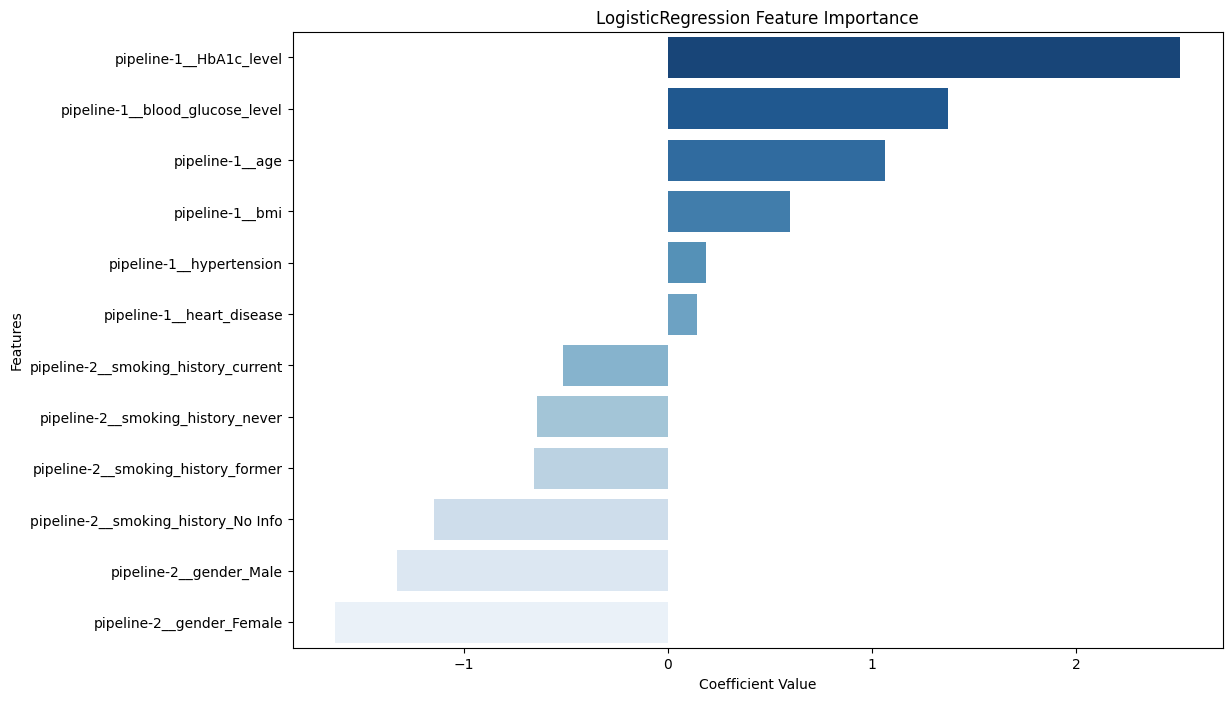

In [ ]:
plot_feature_importance(log_reg.coef_[0], X_processed_df.columns, 'LogisticRegression')

- The model coefficients highlight that factors like age, hypertension, heart disease, BMI, HbA1c, and blood glucose levels have positive associations with diabetes, while gender and smoking history (regardless of status) have negative associations.
-  Model's coefficients align with the insights from the Multivariate analysis

## Hyperparameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': [None, 'l1', 'l2', 'elasticnet'],
    'class_weight': [None, 'balanced']
}

# Create the grid search object
log_gs = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)

# Fit the grid search
%time log_gs.fit(X_train, y_train)

CPU times: user 10.5 s, sys: 5.88 s, total: 16.4 s
Wall time: 10.4 s


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 10.0],
                         'class_weight': [None, 'balanced'],
                         'penalty': [None, 'l1', 'l2', 'elasticnet']})

In [ ]:
print('Logistic Regression base model params')
log_gs.get_params()

Logistic Regression base model params


{'cv': 5,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'deprecated',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(),
 'n_jobs': None,
 'param_grid': {'C': [0.1, 1.0, 10.0],
  'penalty': [None, 'l1', 'l2', 'elasticnet'],
  'class_weight': [None, 'balanced']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [ ]:
print('Logistic Regression GridSearchCV best params')
log_gs.best_params_

Logistic Regression GridSearchCV best params


{'C': 0.1, 'class_weight': None, 'penalty': 'l2'}

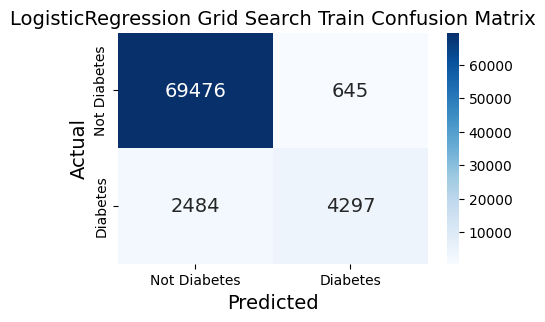

In [44]:
y_train_pred_log_gs = log_gs.predict(X_train)
y_test_pred_log_gs = log_gs.predict(X_test)

plot_confusion_matrix(y_train, y_train_pred_log_gs, labels=cm_labels, title='LogisticRegression Grid Search Train Confusion Matrix')

In [ ]:
log_gs_metrices_df = classification_metrics_df(y_train, y_train_pred_log_gs, y_test, y_test_pred_log_gs, 'LogisticRegression Grid Search')
log_gs_metrices_df

,Metric,Train Set,Test Set,Model
0,Accuracy,0.96,0.96,LogisticRegression Grid Search
1,Precision,0.87,0.86,LogisticRegression Grid Search
2,Recall,0.63,0.62,LogisticRegression Grid Search
3,F1 Score,0.73,0.72,LogisticRegression Grid Search


- grid search shows no improvment

## Train Model with Balanced Data

In [45]:
log_reg_bal = LogisticRegression()
%time log_reg_bal.fit(X_train_balanced, y_train_balanced)

CPU times: user 299 ms, sys: 111 ms, total: 410 ms
Wall time: 226 ms


LogisticRegression()

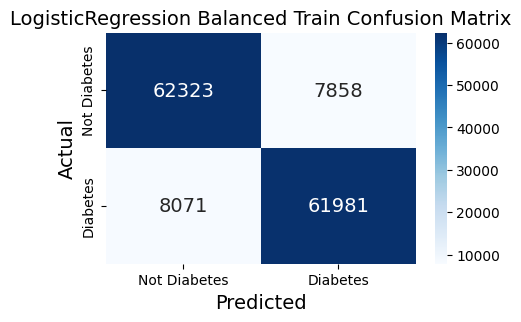

In [46]:
y_train_pred_log_bal = log_reg_bal.predict(X_train_balanced)
y_test_pred_log_bal = log_reg_bal.predict(X_test_balanced)

plot_confusion_matrix(y_train_balanced, y_train_pred_log_bal, labels=cm_labels, title='LogisticRegression Balanced Train Confusion Matrix')

In [ ]:
log_bal_metrices_df = classification_metrics_df(y_train_balanced, y_train_pred_log_bal, y_test_balanced, y_test_pred_log_bal, 'LogisticRegression Balanced')
log_bal_metrices_df

,Metric,Train Set,Test Set,Model
0,Accuracy,0.89,0.89,LogisticRegression Balanced
1,Precision,0.89,0.89,LogisticRegression Balanced
2,Recall,0.88,0.88,LogisticRegression Balanced
3,F1 Score,0.89,0.89,LogisticRegression Balanced


In [ ]:
plot_metrics_with_plotly(log_bal_metrices_df)

- The balanced dataset has **significantly improved** the model's performance. By addressing the class imbalance, the model is better equipped to identify both positive and negative cases accurately.

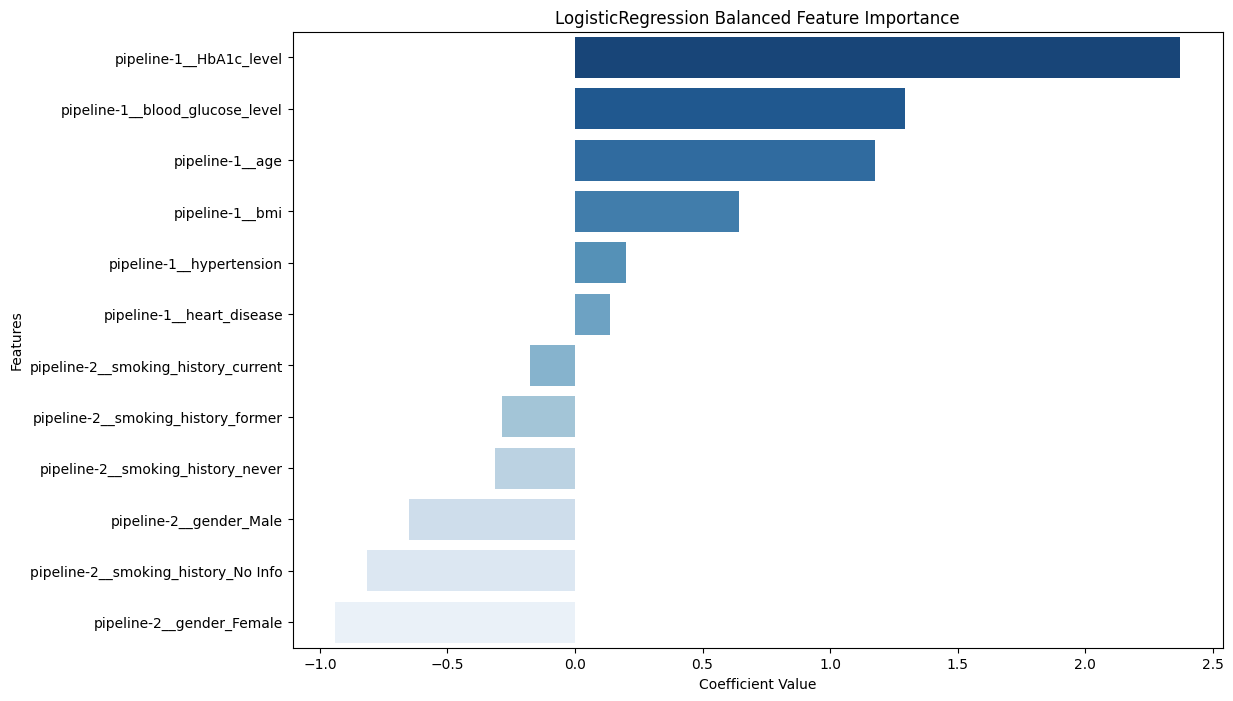

In [ ]:
plot_feature_importance(log_reg_bal.coef_[0], X_resampled.columns, 'LogisticRegression Balanced')

## Summary

In [ ]:
log_metrics_df_list = [log_metrices_df, log_gs_metrices_df, log_bal_metrices_df]
log_combined_metrics_df = combine_and_format_metrics(log_metrics_df_list)
log_combined_metrics_df

,Model,Accuracy Train Set,F1 Score Train Set,Precision Train Set,Recall Train Set,Accuracy Test Set,F1 Score Test Set,Precision Test Set,Recall Test Set
0,LogisticRegression,0.96,0.73,0.87,0.64,0.96,0.72,0.86,0.62
1,LogisticRegression Balanced,0.89,0.89,0.89,0.88,0.89,0.89,0.89,0.88
2,LogisticRegression Grid Search,0.96,0.73,0.87,0.63,0.96,0.72,0.86,0.62


In [ ]:
plot_model_metrics_with_size(log_combined_metrics_df)

**Key Observations:**

- Balancing the Dataset Improves Performance: The model trained on the balanced dataset achieved higher and more balanced performance metrics compared to the other models.
- Grid Search Did Not Significantly Improve Performance: The Grid Search did not lead to substantial improvements, suggesting that the default hyperparameters were reasonably effective.

# Custom vs Scikit-learn Logistic Regression Performance Comparison

In [ ]:
## Custom vs sklearn logistic perfomrance
combined_metrics_df = pd.concat([custom_log_combined_metrics_df, log_combined_metrics_df], axis=0)
combined_metrics_df

,Model,Accuracy Train Set,F1 Score Train Set,Precision Train Set,Recall Train Set,Accuracy Test Set,F1 Score Test Set,Precision Test Set,Recall Test Set
0,Custom LogisticRegression,0.92,0.63,0.52,0.81,0.91,0.62,0.50,0.80
1,Custom LogisticRegression Balanced,0.81,0.84,0.73,0.99,0.81,0.84,0.73,0.99
2,Custom LogisticRegression Grid Search,0.94,0.67,0.62,0.72,0.93,0.65,0.60,0.70
0,LogisticRegression,0.96,0.73,0.87,0.64,0.96,0.72,0.86,0.62
1,LogisticRegression Balanced,0.89,0.89,0.89,0.88,0.89,0.89,0.89,0.88
2,LogisticRegression Grid Search,0.96,0.73,0.87,0.63,0.96,0.72,0.86,0.62


In [ ]:
plot_model_metrics_with_size(combined_metrics_df)

# Training Other Models

## Train with Balanced Data

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

rf_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()
nb_clf = GaussianNB()

models = {
    'Random Forest': rf_clf,
    'K-Nearest Neighbors': knn_clf,
    'Decision Tree': dt_clf,
    'Naive Bayes': nb_clf
}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_balanced, y_train_balanced)
    print(f"{model_name} trained successfully.")
    print()

Training Random Forest...
Random Forest trained successfully.

Training K-Nearest Neighbors...
K-Nearest Neighbors trained successfully.

Training Decision Tree...
Decision Tree trained successfully.

Training Naive Bayes...
Naive Bayes trained successfully.



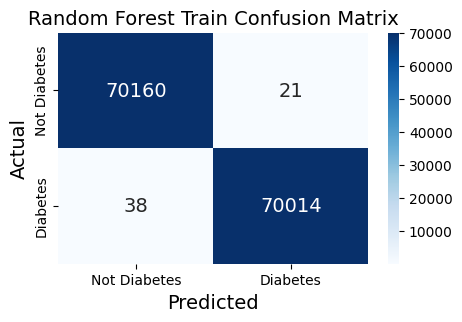

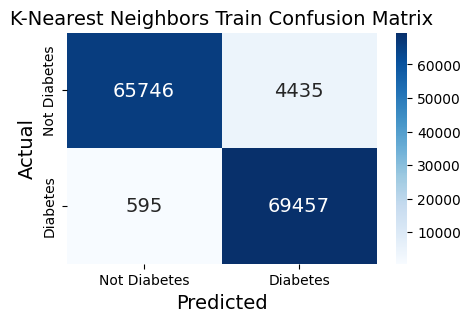

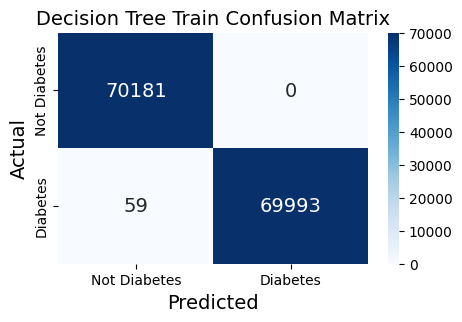

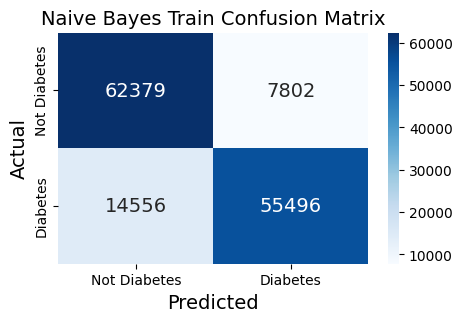

In [48]:
y_train_pred_rf = rf_clf.predict(X_train_balanced)
y_test_pred_rf = rf_clf.predict(X_test_balanced)

y_train_pred_knn = knn_clf.predict(X_train_balanced)
y_test_pred_knn = knn_clf.predict(X_test_balanced)

y_train_pred_dt = dt_clf.predict(X_train_balanced)
y_test_pred_dt = dt_clf.predict(X_test_balanced)

y_train_pred_nb = nb_clf.predict(X_train_balanced)
y_test_pred_nb = nb_clf.predict(X_test_balanced)

plot_confusion_matrix(y_train_balanced, y_train_pred_rf, labels=cm_labels, title='Random Forest Train Confusion Matrix')
plot_confusion_matrix(y_train_balanced, y_train_pred_knn, labels=cm_labels, title='K-Nearest Neighbors Train Confusion Matrix')
plot_confusion_matrix(y_train_balanced, y_train_pred_dt, labels=cm_labels, title='Decision Tree Train Confusion Matrix')
plot_confusion_matrix(y_train_balanced, y_train_pred_nb, labels=cm_labels, title='Naive Bayes Train Confusion Matrix')


In [ ]:
rf_metrices_df = classification_metrics_df(y_train_balanced, y_train_pred_rf, y_test_balanced, y_test_pred_rf, 'Random Forest Balanced')
knn_metrices_df = classification_metrics_df(y_train_balanced, y_train_pred_knn, y_test_balanced, y_test_pred_knn, 'K-Nearest Neighbors Balanced')
dt_metrices_df = classification_metrics_df(y_train_balanced, y_train_pred_dt, y_test_balanced, y_test_pred_dt, 'Decision Tree Balanced')
nb_metrices_df = classification_metrics_df(y_train_balanced, y_train_pred_nb, y_test_balanced, y_test_pred_nb, 'Naive Bayes Balanced')

model_metrics_df_list = [rf_metrices_df, knn_metrices_df, dt_metrices_df, nb_metrices_df]
combined_other_metrics_df = combine_and_format_metrics(model_metrics_df_list)
combined_other_metrics_df

,Model,Accuracy Train Set,F1 Score Train Set,Precision Train Set,Recall Train Set,Accuracy Test Set,F1 Score Test Set,Precision Test Set,Recall Test Set
0,Decision Tree Balanced,1.00,1.00,1.00,1.00,0.97,0.97,0.96,0.97
1,K-Nearest Neighbors Balanced,0.96,0.97,0.94,0.99,0.95,0.95,0.92,0.98
2,Naive Bayes Balanced,0.84,0.83,0.88,0.79,0.83,0.83,0.87,0.79
3,Random Forest Balanced,1.00,1.00,1.00,1.00,0.98,0.98,0.97,0.98


In [ ]:
plot_model_metrics_with_size(combined_other_metrics_df)

- Decision Tree and Random Forest perform exceptionally well, achieving high accuracy and F1 scores on both training and test sets, with Random Forest offering a slight advantage in generalization.
- K-Nearest Neighbors performs well overall, with high recall, though its precision lags behind slightly compared to others.
- Naive Bayes shows lower performance, particularly in recall, and struggles to generalize as well as the other models.

## Train with Imbalanced Data

In [ ]:
rf_clf_imb = RandomForestClassifier()
knn_clf_imb = KNeighborsClassifier()
dt_clf_imb = DecisionTreeClassifier()
nb_clf_imb = GaussianNB()

models_imb = {
    'Random Forest': rf_clf_imb,
    'K-Nearest Neighbors': knn_clf_imb,
    'Decision Tree': dt_clf_imb,
    'Naive Bayes': nb_clf_imb
}

for model_name, model in models_imb.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    print(f"{model_name} trained successfully.")
    print()

Training Random Forest...
Random Forest trained successfully.

Training K-Nearest Neighbors...
K-Nearest Neighbors trained successfully.

Training Decision Tree...
Decision Tree trained successfully.

Training Naive Bayes...
Naive Bayes trained successfully.



In [ ]:
y_train_pred_rf_imb = rf_clf_imb.predict(X_train)
y_test_pred_rf_imb = rf_clf_imb.predict(X_test)

y_train_pred_knn_imb = knn_clf_imb.predict(X_train)
y_test_pred_knn_imb = knn_clf_imb.predict(X_test)

y_train_pred_dt_imb = dt_clf_imb.predict(X_train)
y_test_pred_dt_imb = dt_clf_imb.predict(X_test)

y_train_pred_nb_imb = nb_clf_imb.predict(X_train)
y_test_pred_nb_imb = nb_clf_imb.predict(X_test)

rf_metrices_df_imb = classification_metrics_df(y_train, y_train_pred_rf_imb, y_test, y_test_pred_rf_imb, 'Random Forest')
knn_metrices_df_imb = classification_metrics_df(y_train, y_train_pred_knn_imb, y_test, y_test_pred_knn_imb, 'K-Nearest Neighbors')
dt_metrices_df_imb = classification_metrics_df(y_train, y_train_pred_dt_imb, y_test, y_test_pred_dt_imb, 'Decision Tree')
nb_metrices_df_imb = classification_metrics_df(y_train, y_train_pred_nb_imb, y_test, y_test_pred_nb_imb, 'Naive Bayes')

model_metrics_df_list_imb = [rf_metrices_df_imb, knn_metrices_df_imb, dt_metrices_df_imb, nb_metrices_df_imb]
combined_other_metrics_df_imb = combine_and_format_metrics(model_metrics_df_list_imb)
combined_other_metrics_df_imb


,Model,Accuracy Train Set,F1 Score Train Set,Precision Train Set,Recall Train Set,Accuracy Test Set,F1 Score Test Set,Precision Test Set,Recall Test Set
0,Decision Tree,1.00,1.00,1.00,0.99,0.95,0.71,0.69,0.72
1,K-Nearest Neighbors,0.97,0.80,0.94,0.69,0.96,0.73,0.89,0.62
2,Naive Bayes,0.90,0.55,0.46,0.66,0.90,0.53,0.45,0.65
3,Random Forest,1.00,1.00,1.00,0.99,0.97,0.78,0.93,0.67


In [ ]:
plot_model_metrics_with_size(combined_other_metrics_df_imb)

# ALL Models Performance

In [ ]:
all_models_metrics_df_list = [custom_log_combined_metrics_df, log_combined_metrics_df, combined_other_metrics_df, combined_other_metrics_df_imb]
all_models_combined_metrics_df = pd.concat(all_models_metrics_df_list, axis=0)
all_models_combined_metrics_df

,Model,Accuracy Train Set,F1 Score Train Set,Precision Train Set,Recall Train Set,Accuracy Test Set,F1 Score Test Set,Precision Test Set,Recall Test Set
0,Custom LogisticRegression,0.92,0.63,0.52,0.81,0.91,0.62,0.50,0.80
1,Custom LogisticRegression Balanced,0.81,0.84,0.73,0.99,0.81,0.84,0.73,0.99
2,Custom LogisticRegression Grid Search,0.94,0.67,0.62,0.72,0.93,0.65,0.60,0.70
0,LogisticRegression,0.96,0.73,0.87,0.64,0.96,0.72,0.86,0.62
1,LogisticRegression Balanced,0.89,0.89,0.89,0.88,0.89,0.89,0.89,0.88
2,LogisticRegression Grid Search,0.96,0.73,0.87,0.63,0.96,0.72,0.86,0.62
0,Decision Tree Balanced,1.00,1.00,1.00,1.00,0.97,0.97,0.96,0.97
1,K-Nearest Neighbors Balanced,0.96,0.97,0.94,0.99,0.95,0.95,0.92,0.98
2,Naive Bayes Balanced,0.84,0.83,0.88,0.79,0.83,0.83,0.87,0.79
3,Random Forest Balanced,1.00,1.00,1.00,1.00,0.98,0.98,0.97,0.98


In [ ]:
plot_model_metrics_with_size(all_models_combined_metrics_df, width=1300, height=700)

In [ ]:
# all_models_combined_metrics_df.to_markdown()

# Final Summary
- The balanced models (Logistic Regression Balanced, Decision Tree Balanced, and Random Forest Balanced) performed exceptionally well, especially for recall, making them suitable for tasks where both precision and recall are critical.
-	Overfitting: Several models, particularly Decision Trees and Random Forests, exhibited perfect or near-perfect performance on the training set but poorer results on the test set, indicating overfitting.
-	Naive Bayes underperformed in comparison, particularly in recall, suggesting that it is less suitable for this dataset.


|    | Model                                 |   Accuracy Train Set |   F1 Score Train Set |   Precision Train Set |   Recall Train Set |   Accuracy Test Set |   F1 Score Test Set |   Precision Test Set |   Recall Test Set |
|---:|:--------------------------------------|---------------------:|---------------------:|----------------------:|-------------------:|--------------------:|--------------------:|---------------------:|------------------:|
|  0 | Custom LogisticRegression             |                 0.92 |                 0.63 |                  0.52 |               0.81 |                0.91 |                0.62 |                 0.5  |              0.8  |
|  1 | Custom LogisticRegression Balanced    |                 0.81 |                 0.84 |                  0.73 |               0.99 |                0.81 |                0.84 |                 0.73 |              0.99 |
|  2 | Custom LogisticRegression Grid Search |                 0.94 |                 0.67 |                  0.62 |               0.72 |                0.93 |                0.65 |                 0.6  |              0.7  |
|  0 | LogisticRegression                    |                 0.96 |                 0.73 |                  0.87 |               0.64 |                0.96 |                0.72 |                 0.86 |              0.62 |
|  1 | LogisticRegression Balanced           |                 0.89 |                 0.89 |                  0.89 |               0.88 |                0.89 |                0.89 |                 0.89 |              0.88 |
|  2 | LogisticRegression Grid Search        |                 0.96 |                 0.73 |                  0.87 |               0.63 |                0.96 |                0.72 |                 0.86 |              0.62 |
|  0 | Decision Tree Balanced                |                 1    |                 1    |                  1    |               1    |                0.97 |                0.97 |                 0.96 |              0.97 |
|  1 | K-Nearest Neighbors Balanced          |                 0.96 |                 0.97 |                  0.94 |               0.99 |                0.95 |                0.95 |                 0.92 |              0.98 |
|  2 | Naive Bayes Balanced                  |                 0.84 |                 0.83 |                  0.88 |               0.79 |                0.83 |                0.83 |                 0.87 |              0.79 |
|  3 | Random Forest Balanced                |                 1    |                 1    |                  1    |               1    |                0.98 |                0.98 |                 0.97 |              0.98 |
|  0 | Decision Tree                         |                 1    |                 1    |                  1    |               0.99 |                0.95 |                0.71 |                 0.69 |              0.72 |
|  1 | K-Nearest Neighbors                   |                 0.97 |                 0.8  |                  0.94 |               0.69 |                0.96 |                0.73 |                 0.89 |              0.62 |
|  2 | Naive Bayes                           |                 0.9  |                 0.55 |                  0.46 |               0.66 |                0.9  |                0.53 |                 0.45 |              0.65 |
|  3 | Random Forest                         |                 1    |                 1    |                  1    |               0.99 |                0.97 |                0.78 |                 0.93 |              0.67 |